In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
BATCH_SIZE=200
EPOCHS=30

In [2]:
def creare_model():
    inputs = tf.keras.Input(shape=(28,28,1)) 
    x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
    x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, x)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [3]:
model = create_model()

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0     

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
x_train = x_train[..., tf.newaxis].astype('float32')
x_test = x_test[..., tf.newaxis].astype('float32')
y_train = tf.keras.utils.to_categorical(y_train) 
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
   rescale=1./255,
   rotation_range=15,
   width_shift_range=0.2,
   height_shift_range=0.1,
   zoom_range=0.1)

In [12]:
training_set = train_gen.flow(x_train,y_train,batch_size=BATCH_SIZE)
test_set = train_gen.flow(x_test,y_test,batch_size=BATCH_SIZE)

In [13]:
es_callback = tf.keras.callbacks.EarlyStopping(
   monitor='val_loss', # better than val_acc
   patience=3, 
   mode='auto', # default
   verbose=1)

In [14]:
history = model.fit(training_set,
                     steps_per_epoch=len(x_train) // BATCH_SIZE, # 300
                     validation_data=test_set,
                     validation_steps=len(x_test) // BATCH_SIZE, # 50
                     epochs=EPOCHS,
                     callbacks=[es_callback])

Epoch 1/30
300/300 [==============================] - 34s 112ms/step - loss: 0.4320 - accuracy: 0.8612 - val_loss: 0.1436 - val_accuracy: 0.9538
Epoch 2/30
300/300 [==============================] - 34s 115ms/step - loss: 0.1196 - accuracy: 0.9629 - val_loss: 0.0726 - val_accuracy: 0.9781
Epoch 3/30
300/300 [==============================] - 33s 110ms/step - loss: 0.0888 - accuracy: 0.9730 - val_loss: 0.0653 - val_accuracy: 0.9790
Epoch 4/30
300/300 [==============================] - 34s 115ms/step - loss: 0.0718 - accuracy: 0.9783 - val_loss: 0.0576 - val_accuracy: 0.9822
Epoch 5/30
300/300 [==============================] - 34s 113ms/step - loss: 0.0597 - accuracy: 0.9811 - val_loss: 0.0427 - val_accuracy: 0.9869
Epoch 6/30
300/300 [==============================] - 35s 116ms/step - loss: 0.0534 - accuracy: 0.9837 - val_loss: 0.0485 - val_accuracy: 0.9839
Epoch 7/30
300/300 [==============================] - 33s 110ms/step - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0400 - val_ac

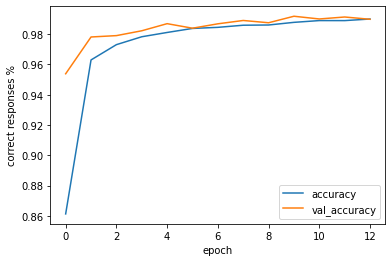

In [15]:
plt.plot(history.history['accuracy'],
         label='accuracy')
plt.plot(history.history['val_accuracy'],
         label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('correct responses %')
plt.legend()
plt.show()

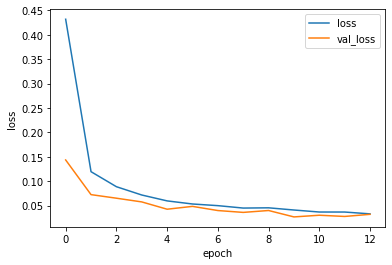

In [16]:
plt.plot(history.history['loss'],
         label='loss')
plt.plot(history.history['val_loss'],
         label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
model.save_weights('es_func_weights')